# Spam Classification


Let's Get started, I have used datasets from
UCI Spam dataset : https://www.kaggle.com/uciml/sms-spam-collection-dataset

Now, here we start with spam classification so we will allotting binary values to labels so that Machine Learning model can work efficiently in predicting the results

# Steps taken
* Load the libraries
* Data Cleaning
* Assigning Binary Values to Labels
* Data Visualization (Part-1)
* LowerCasing, Punctuation removing and Vocabulary modifications
* Counting The Occurence of Words
* Training, Testing Part of the model
* Data Visualization (Part-2)

# Loading the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
filepath='../input/sms-spam-collection-dataset/spam.csv'
df=pd.read_csv(filepath, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning
We, start with dropping columns with missing values

In [3]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'labels','v2': 'sms'})
df.head()

,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Assigning Binary Values

We fix our response values for spam and ham

In [4]:
df['labels']=df.labels.map({'spam':0, 'ham':1})
df.head()

,labels,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df['length']=df['sms'].apply(len)
df.head()

,labels,sms,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualization (Part-1)

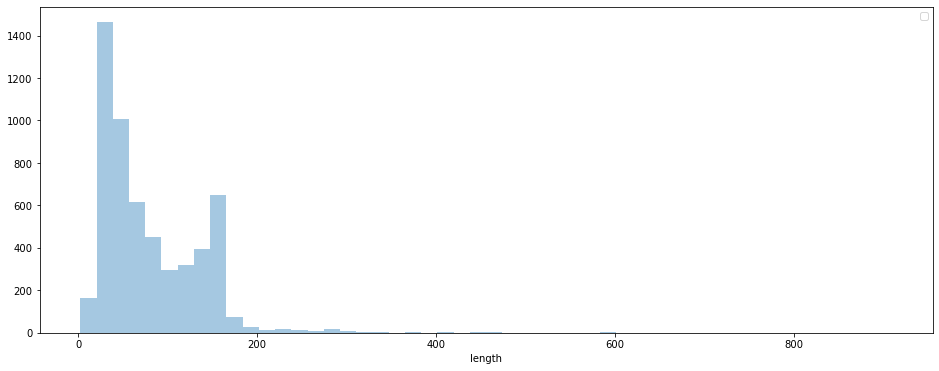

In [7]:
plt.figure(figsize=(16,6))
sns.distplot(a=df['length'],kde=False)
plt.legend()

In [8]:
message=df[df['length']==910]['sms'].iloc[0]
message

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# LowerCasing, Punctuations and Vocab. modifications

Now we will implement Bag of Words which will count the number of words based on their frequency distribution and that binary number will be fed for Machine Learning model


We start with using lowercase for all the words in the above sentence

In [9]:
message={"""
For me the love should start 
         with attraction.i should feel that 
         I need her every time around me.she should be the first thing which comes in my thoughts.
         I would start the day and end it with her.she should be there every time I dream.love will be 
         then when my every breath has her name.my life should happen around her.my life will be named to her.
         I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.
         I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that 
         my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when 
         I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.
         will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.
"""}
lower_case=[]
for i in message:
    lower_case=[i.lower() for i in message]
    print(lower_case)

["\nfor me the love should start \n         with attraction.i should feel that \n         i need her every time around me.she should be the first thing which comes in my thoughts.\n         i would start the day and end it with her.she should be there every time i dream.love will be \n         then when my every breath has her name.my life should happen around her.my life will be named to her.\n         i would cry for her.will give all my happiness and take all her sorrows.i will be ready to fight with anyone for her.\n         i will be in love when i will be doing the craziest things for her.love will be when i don't have to proove anyone that \n         my girl is the most beautiful lady on the whole planet.i will always be singing praises for her.love will be when \n         i start up making chicken curry and end up makiing sambar.life will be the most beautiful then.\n         will get every morning and thank god for the day because she is with me.i would like to say a lot..will

Now we will use punctutation for sorting out the sentences

In [10]:
sans_punctuation = []
import string

for i in lower_case:
    sans_punctuation.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation)

['\nfor me the love should start \n         with attractioni should feel that \n         i need her every time around meshe should be the first thing which comes in my thoughts\n         i would start the day and end it with hershe should be there every time i dreamlove will be \n         then when my every breath has her namemy life should happen around hermy life will be named to her\n         i would cry for herwill give all my happiness and take all her sorrowsi will be ready to fight with anyone for her\n         i will be in love when i will be doing the craziest things for herlove will be when i dont have to proove anyone that \n         my girl is the most beautiful lady on the whole planeti will always be singing praises for herlove will be when \n         i start up making chicken curry and end up makiing sambarlife will be the most beautiful then\n         will get every morning and thank god for the day because she is with mei would like to say a lotwill tell later\n']


**Tokenization**

In [11]:
preprocessed_documents = []
for i in sans_punctuation:
     preprocessed_documents=[[w for w in i.split()] for i in message]
print(preprocessed_documents)

[['For', 'me', 'the', 'love', 'should', 'start', 'with', 'attraction.i', 'should', 'feel', 'that', 'I', 'need', 'her', 'every', 'time', 'around', 'me.she', 'should', 'be', 'the', 'first', 'thing', 'which', 'comes', 'in', 'my', 'thoughts.', 'I', 'would', 'start', 'the', 'day', 'and', 'end', 'it', 'with', 'her.she', 'should', 'be', 'there', 'every', 'time', 'I', 'dream.love', 'will', 'be', 'then', 'when', 'my', 'every', 'breath', 'has', 'her', 'name.my', 'life', 'should', 'happen', 'around', 'her.my', 'life', 'will', 'be', 'named', 'to', 'her.', 'I', 'would', 'cry', 'for', 'her.will', 'give', 'all', 'my', 'happiness', 'and', 'take', 'all', 'her', 'sorrows.I', 'will', 'be', 'ready', 'to', 'fight', 'with', 'anyone', 'for', 'her.', 'I', 'will', 'be', 'in', 'love', 'when', 'I', 'will', 'be', 'doing', 'the', 'craziest', 'things', 'for', 'her.love', 'will', 'be', 'when', 'I', "don't", 'have', 'to', 'proove', 'anyone', 'that', 'my', 'girl', 'is', 'the', 'most', 'beautiful', 'lady', 'on', 'the',

Now we begin with counting the numbers as how much is their frequency

In [12]:
import pprint
from collections import Counter
frequency_num=[]

for i in preprocessed_documents:
    frequency_count=Counter(i)
    frequency_num.append(frequency_count)
pprint.pprint(frequency_num)

[Counter({'be': 11,
          'will': 10,
          'the': 8,
          'I': 8,
          'should': 5,
          'for': 5,
          'with': 4,
          'every': 4,
          'my': 4,
          'and': 4,
          'when': 4,
          'to': 4,
          'start': 3,
          'her': 3,
          'would': 3,
          'love': 2,
          'that': 2,
          'time': 2,
          'around': 2,
          'in': 2,
          'day': 2,
          'end': 2,
          'life': 2,
          'her.': 2,
          'all': 2,
          'anyone': 2,
          'her.love': 2,
          'is': 2,
          'most': 2,
          'beautiful': 2,
          'up': 2,
          'For': 1,
          'me': 1,
          'attraction.i': 1,
          'feel': 1,
          'need': 1,
          'me.she': 1,
          'first': 1,
          'thing': 1,
          'which': 1,
          'comes': 1,
          'thoughts.': 1,
          'it': 1,
          'her.she': 1,
          'there': 1,
          'dream.love': 1,
          't

# Counting The Occurence of Words

Let's try the above with CountVectorizer tool 

In [13]:
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


Now, using count_vector i have converted the words to vocabulary as well

In [14]:
count_vector.fit(message)
voc=count_vector.get_feature_names()
voc

['all',
 'always',
 'and',
 'anyone',
 'around',
 'attraction',
 'be',
 'beautiful',
 'because',
 'breath',
 'chicken',
 'comes',
 'craziest',
 'cry',
 'curry',
 'day',
 'doing',
 'don',
 'dream',
 'end',
 'every',
 'feel',
 'fight',
 'first',
 'for',
 'get',
 'girl',
 'give',
 'god',
 'happen',
 'happiness',
 'has',
 'have',
 'her',
 'in',
 'is',
 'it',
 'lady',
 'later',
 'life',
 'like',
 'lot',
 'love',
 'makiing',
 'making',
 'me',
 'morning',
 'most',
 'my',
 'name',
 'named',
 'need',
 'on',
 'planet',
 'praises',
 'proove',
 'ready',
 'sambar',
 'say',
 'she',
 'should',
 'singing',
 'sorrows',
 'start',
 'take',
 'tell',
 'thank',
 'that',
 'the',
 'then',
 'there',
 'thing',
 'things',
 'thoughts',
 'time',
 'to',
 'up',
 'when',
 'which',
 'whole',
 'will',
 'with',
 'would']


we convert the message words to array form

In [15]:
doc_to_array=count_vector.transform(voc).toarray()
doc_to_array

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

Table created 

In [16]:
frequency_matrix = pd.DataFrame(doc_to_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,all,always,and,anyone,around,attraction,be,beautiful,because,breath,...,thoughts,time,to,up,when,which,whole,will,with,would
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Training and Testing the model

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'],df['labels'],random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [19]:
training_data=count_vector.fit_transform(X_train)
testing_data=count_vector.transform(X_test)

In [20]:
mnb=MultinomialNB()
mnb.fit(training_data, y_train)

predictions=mnb.predict(testing_data)
mnb_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9856424982053122
precision score:  0.990139687756779
recall score:  0.9934047815333883
f1 score:  0.9917695473251028


Using Decision Trees

In [21]:
dtc=DecisionTreeClassifier()
dtc.fit(training_data,y_train)

predictions=dtc.predict(testing_data)
dtc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.964824120603015
precision score:  0.9841930116472546
recall score:  0.9752679307502061
f1 score:  0.9797101449275363


RandomForest Classifier

In [22]:
rfc=RandomForestClassifier()
rfc.fit(training_data,y_train)

predictions=rfc.predict(testing_data)
rfc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9842067480258435
precision score:  0.983753046303818
recall score:  0.998351195383347
f1 score:  0.9909983633387889


KNN

In [23]:
knn=KNeighborsClassifier()
knn.fit(training_data, y_train)

predictions=knn.predict(testing_data)
knn_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9217516152189519
precision score:  0.9175491679273827
recall score:  1.0
f1 score:  0.9570019723865877


Bagging Classifer and AdaBoost

In [24]:
bgc=BaggingClassifier()
bgc.fit(training_data, y_train)

predictions=bgc.predict(testing_data)
bgc_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9734386216798278
precision score:  0.9891846921797005
recall score:  0.9802143446001649
f1 score:  0.9846790890269151


In [25]:
#AdaBoost
adb=AdaBoostClassifier()
adb.fit(training_data, y_train)
predictions=adb.predict(testing_data)
adb_accuracy = accuracy_score(y_test,predictions)
print('Accuracy score: ', format(accuracy_score(y_test,predictions)))
print('precision score: ', format(precision_score(y_test,predictions)))
print('recall score: ', format(recall_score(y_test,predictions)))
print('f1 score: ', format(f1_score(y_test,predictions)))

Accuracy score:  0.9763101220387652
precision score:  0.9796747967479674
recall score:  0.9934047815333883
f1 score:  0.9864920180106427


# Data Visualization (Part-2)

**Accuracy Plots estimations **

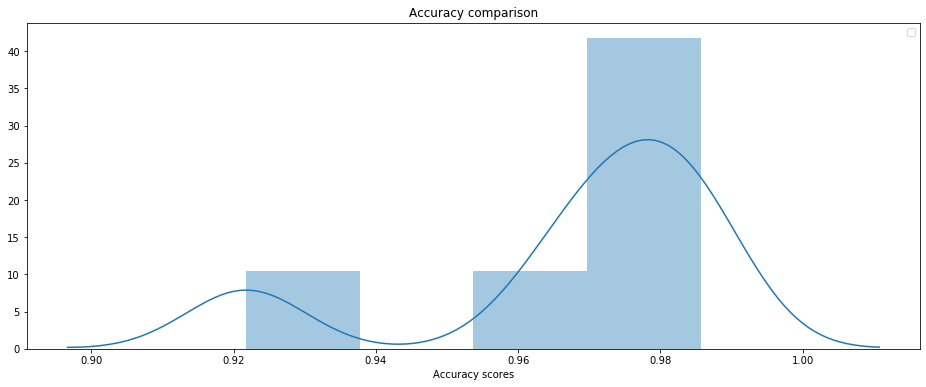

In [26]:
clf=(mnb_accuracy,dtc_accuracy,rfc_accuracy,knn_accuracy,bgc_accuracy,adb_accuracy)
plt.figure(figsize=(16,6))
sns.distplot(a=clf, hist=True)
plt.xlabel('Accuracy scores')
plt.title('Accuracy comparison')
plt.legend()

Bar plot for all model accuracies

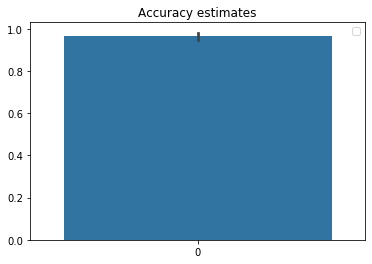

In [27]:
sns.barplot(data=clf)
plt.title('Accuracy estimates')
plt.legend()

Any suggestions feel free to comment

Hope you enjoyed this!!